In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd

from kmeans_pytorch import kmeans
#! pip install kmeans-pytorch

#### K-Means Clustering

In [2]:
def customer_clustering(customer_embed, num_clusters, name_path):
    data_size, dims = customer_embed.size(0), cust_embed.size(1)

    cluster_ids_x, cluster_centers = kmeans(
        X=customer_embed, num_clusters=num_clusters, distance='cosine', device=torch.device('cuda:1')) # 'euclidean', 'cosine'
    plt.bar(list(range(num_clusters)), pd.Series(cluster_ids_x.cpu().numpy()).value_counts().sort_index())
    pd.DataFrame({'Index_Customer': list(range(data_size)), 'Cluster': cluster_ids_x}).to_csv(name_path+'clustering.csv')
    return cluster_ids_x, cluster_centers

#### Count Purshase by Category and Count Purshase by Category

In [3]:
def distr_category(cluster_ids_x, data, name_path):
    clustering = pd.DataFrame(columns = ['head', 'cluster'])
    clustering['head'] = list(range(len(cluster_ids_x)))
    clustering['cluster'] = [str(int(i)) for i in cluster_ids_x]
    df = pd.merge(data, clustering, how='left', on='head')
    
    mean_cluster_category = pd.DataFrame(index = df['tail_type'].unique())

    for i in np.sort(df.cluster.unique()):
        temp = pd.Series(df[df.cluster == i]['tail_type'].value_counts().sort_index(), name=i)
        mean_cluster_category = pd.merge(mean_cluster_category, temp, left_index=True, right_index=True, how = 'left')
    
    display(mean_cluster_category)
    
    df2 = pd.Series(list(df['relation']), index=[df['cluster'], df['tail_type']])
    mean_cluster_amount = pd.DataFrame(index = df['tail_type'].unique())

    for i in np.sort(df.cluster.unique()):
        temp = pd.Series(df2[i].groupby('tail_type').sum().sort_index(), name=i)
        mean_cluster_amount = pd.merge(mean_cluster_amount, temp, left_index=True, right_index=True, how = 'left')
    
    mean_cluster_amount.loc['Total',:]= mean_cluster_amount.sum(axis=0)
    display(mean_cluster_amount)
    
    mean_cluster_category.to_csv(name_path + 'Count_purchase.csv')
    mean_cluster_amount.to_csv(name_path + 'Amount_purchase.csv')
    
    return mean_cluster_category, mean_cluster_amount

In [4]:
NUM_CLUSTERS = 10

running k-means on cuda:1..


[running kmeans]: 171it [00:02, 63.12it/s, center_shift=0.000094, iteration=171, tol=0.000100]


,0,2,3,4,5,6,7,8
Beauty,53,5,6837,NaN,10.0,8909,41,86
"Clothes, Shoes",98,8,19007,1.0,5.0,19525,28,204
Fast Food,1313,6,137088,113.0,46.0,179685,319,2144
Fuel,5,8,28136,NaN,NaN,31072,32,216
"House, Repair",69,54,16997,2.0,7.0,15455,10,132
Miscellaneous Goods,281,12,41767,12.0,6.0,45952,64,752
Pharmacies,149,7,30798,NaN,15.0,35404,79,379
Restaurants,110,82,37016,6.0,8.0,52449,85,270
Supermarkets,5141,359,468383,271.0,172.0,497313,831,4286
Transport,1283,89,75127,17.0,121.0,80884,533,714


,0,2,3,4,5,6,7,8
Beauty,51646.00,10959.00,6.857551e+06,NaN,8257.80,9.466828e+06,60291.45,67601.75
"Clothes, Shoes",172083.35,13149.00,3.039078e+07,90.00,7426.00,3.576926e+07,56754.20,268370.00
Fast Food,385751.76,2383.00,3.785288e+07,37148.80,8896.00,4.945198e+07,125750.50,551443.35
Fuel,870.11,1070.00,2.860310e+07,NaN,NaN,2.994657e+07,23651.92,260492.98
"House, Repair",110543.11,7450.91,4.829227e+07,5110.00,12750.80,3.481908e+07,12494.00,272908.06
Miscellaneous Goods,88917.37,2093.00,2.357501e+07,22431.00,11743.00,2.897412e+07,77793.00,241356.17
Pharmacies,62126.31,3170.00,1.813950e+07,NaN,11697.97,2.114974e+07,57889.70,175422.10
Restaurants,62850.87,18515.00,2.007750e+07,1570.00,7670.00,2.969356e+07,57676.25,196439.47
Supermarkets,1014116.18,168472.51,2.021577e+08,84542.96,63174.57,2.193868e+08,578504.66,1673663.24
Transport,68719.20,20070.00,9.223365e+06,17500.00,18045.00,1.094486e+07,37865.60,58181.50


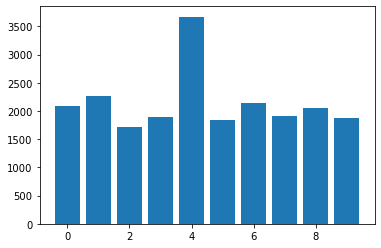

In [5]:
NAME_PATH = 'log//RES_100_1//ComplEx//'

model_complex = torch.load(NAME_PATH+'model.pt', map_location="cuda:1")
cust_embed = model_complex['entity_embedding']
data = pd.read_csv ('data//df_100_1.csv')

cluster_ids_x, cluster_centers = customer_clustering(cust_embed, NUM_CLUSTERS, NAME_PATH)
count_df, amount_df = distr_category(cluster_ids_x, data, NAME_PATH)

running k-means on cuda:1..


[running kmeans]: 102it [00:01, 64.53it/s, center_shift=0.000068, iteration=102, tol=0.000100]


,0,2,3,7,9
Beauty,26,5253,2999,3428,4235
"Clothes, Shoes",67,10278,8274,10010,10247
Fast Food,1187,86104,64986,78127,90310
Fuel,265,12211,12782,19379,14832
"House, Repair",86,9536,6872,8452,7780
Miscellaneous Goods,194,22976,19201,22109,24366
Pharmacies,99,18408,13574,16025,18725
Restaurants,169,24824,18271,23940,22822
Supermarkets,1876,275274,228570,221372,249664
Transport,235,47533,41518,31901,37581


,0,2,3,7,9
Beauty,16532.10,4.633726e+06,2.992380e+06,4.213499e+06,4.666997e+06
"Clothes, Shoes",77607.76,1.737264e+07,1.365391e+07,1.815295e+07,1.742080e+07
Fast Food,295975.86,2.337886e+07,1.744502e+07,2.237654e+07,2.491984e+07
Fuel,213583.96,1.170594e+07,1.084780e+07,2.202469e+07,1.404375e+07
"House, Repair",144954.40,3.349871e+07,1.380025e+07,1.972921e+07,1.635949e+07
Miscellaneous Goods,93354.30,1.261309e+07,1.159632e+07,1.388296e+07,1.480775e+07
Pharmacies,55218.63,1.038994e+07,7.608522e+06,9.597515e+06,1.194834e+07
Restaurants,128607.45,1.237459e+07,9.845725e+06,1.424706e+07,1.351980e+07
Supermarkets,827265.61,1.104527e+08,9.428542e+07,1.076819e+08,1.118797e+08
Transport,51323.92,5.546546e+06,4.635388e+06,5.076841e+06,5.078510e+06


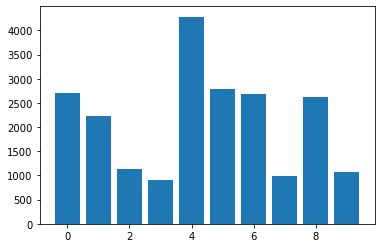

In [6]:
NAME_PATH = 'log//RES_100_1//DistMult//'

model_complex = torch.load(NAME_PATH+'model.pt', map_location="cuda:1")
cust_embed = model_complex['entity_embedding']
data = pd.read_csv ('data//df_100_1.csv')

cluster_ids_x, cluster_centers = customer_clustering(cust_embed, NUM_CLUSTERS, NAME_PATH)
count_df, amount_df = distr_category(cluster_ids_x, data, NAME_PATH)

running k-means on cuda:1..


[running kmeans]: 240it [00:03, 75.26it/s, center_shift=0.000068, iteration=240, tol=0.000100]


,0,1,2,3,4,5,6,7,8,9
Beauty,1918,1568,1835,1675,1512,1692,1306,1644,1350,1441
"Clothes, Shoes",4647,3598,3901,4229,3989,4608,4170,3198,2863,3673
Fast Food,40031,31399,30484,40191,30633,36996,30351,28211,23833,28585
Fuel,7795,5458,5309,6416,5291,7192,5714,4796,5099,6399
"House, Repair",5319,2894,2918,3635,3513,3567,2681,3109,2312,2778
Miscellaneous Goods,9613,8648,10467,10577,9364,9518,7731,7581,6858,8489
Pharmacies,8400,6485,6986,7544,6714,8193,5336,6295,4731,6147
Restaurants,10382,8127,8723,10203,9535,11114,7709,8543,7404,8286
Supermarkets,112054,99012,103016,114176,102121,114506,81187,87054,68811,94819
Transport,18988,15449,14303,20000,17441,19608,12161,18941,8090,13787


,0,1,2,3,4,5,6,7,8,9
Beauty,1.999146e+06,1470952.05,1603986.31,1.869938e+06,1613203.76,1.979974e+06,1607131.05,1580414.11,1158902.57,1639486.27
"Clothes, Shoes",8.303149e+06,6398088.86,5937295.18,7.369735e+06,6527759.76,6.961134e+06,8656637.93,5860127.96,4408869.66,6255112.28
Fast Food,1.148272e+07,8498173.81,8121777.79,1.090219e+07,8619653.39,1.010836e+07,8597320.75,7767629.06,6376594.01,7941815.60
Fuel,6.947267e+06,4793238.96,8200324.24,5.715194e+06,5452366.44,7.060121e+06,5828584.85,4449095.48,4528567.59,5861002.81
"House, Repair",2.225215e+07,4841409.67,6202623.21,7.860638e+06,7686858.70,7.998766e+06,5301143.71,11813978.37,4582906.92,4992133.40
Miscellaneous Goods,6.753359e+06,4311155.70,5158042.18,5.935655e+06,5097866.38,6.955331e+06,4871162.89,4833024.87,4391200.20,4686670.37
Pharmacies,5.053782e+06,3939030.57,4192124.82,4.238336e+06,3991869.46,5.156595e+06,3012420.11,3580628.87,2702659.84,3732091.68
Restaurants,6.279119e+06,4496532.04,5378062.37,5.728937e+06,4962287.63,5.837630e+06,4418468.52,4227375.55,4222216.75,4565151.03
Supermarkets,5.457387e+07,39514917.80,42367781.42,4.842127e+07,43514703.71,5.351031e+07,36592596.49,37849000.27,30420033.28,38362505.46
Transport,2.506893e+06,2087724.98,2004331.89,2.645843e+06,2147089.43,2.359726e+06,1758395.26,1897912.96,1208664.78,1772026.11


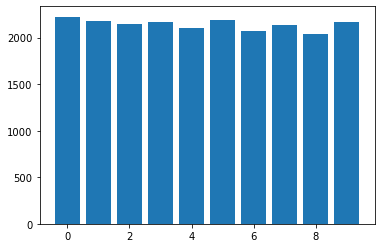

In [7]:
NAME_PATH = 'log//RES_100_1//RotatE//'

model_complex = torch.load(NAME_PATH+'model.pt', map_location="cuda:1")
cust_embed = model_complex['entity_embedding']
data = pd.read_csv ('data//df_100_1.csv')

cluster_ids_x, cluster_centers = customer_clustering(cust_embed, NUM_CLUSTERS, NAME_PATH)
count_df, amount_df = distr_category(cluster_ids_x, data, NAME_PATH)

running k-means on cuda:1..


[running kmeans]: 178it [00:02, 66.26it/s, center_shift=0.000039, iteration=178, tol=0.000100]


,0,1,2,3,4,5,6,7,8,9
Beauty,2133,1984,1597,1595,1438,1530,1183,1382,1509,1590
"Clothes, Shoes",5006,4172,3891,4272,4018,3844,3015,3294,3391,3973
Fast Food,38271,29157,32286,35159,33743,33488,25839,28589,29765,34417
Fuel,6303,5124,5834,6701,6172,5740,5317,6107,5226,6945
"House, Repair",4491,3806,2873,3521,3085,3252,2665,2834,2982,3217
Miscellaneous Goods,9993,10000,8803,9101,9437,9757,7036,8313,7524,8882
Pharmacies,8475,7305,6066,7144,6813,6626,5431,6082,5652,7237
Restaurants,11486,9479,10059,9148,9231,9400,6308,7388,7709,9818
Supermarkets,114903,101865,96064,101242,100910,96479,78849,90562,91451,104431
Transport,18972,18597,18708,17159,17693,16781,9795,12316,15881,12866


,0,1,2,3,4,5,6,7,8,9
Beauty,2.087182e+06,1778653.46,1549300.18,1596571.06,1655293.09,1912014.27,1324212.13,1468672.09,1529401.28,1621834.78
"Clothes, Shoes",8.256180e+06,7369060.33,5865628.28,6495133.38,7182956.37,6647878.38,4898451.20,5707956.64,7000579.63,7254085.53
Fast Food,1.097043e+07,8030947.70,8841375.44,9395112.93,9082779.95,9187863.65,7126709.42,7798607.71,8707160.29,9275247.43
Fuel,5.942617e+06,4470967.22,5782294.50,6011903.06,5713928.46,5272740.48,8146224.26,5652253.67,4874135.63,6968697.90
"House, Repair",1.534855e+07,13789643.35,6371604.28,6469939.16,5925271.42,7865005.04,7924448.36,6615770.38,5683734.84,7538638.41
Miscellaneous Goods,6.365416e+06,4883343.19,4995545.05,5105363.69,5640007.17,5354552.21,5563878.42,4800857.80,4571132.34,5713372.01
Pharmacies,4.896445e+06,4434641.50,3465863.30,4279544.02,4106156.97,3918079.37,3163342.89,3493739.26,3616375.69,4225349.86
Restaurants,6.365730e+06,4475157.06,4977237.21,4805793.33,5828299.67,5403587.42,3765253.18,4323040.83,4373631.43,5798050.03
Supermarkets,5.282968e+07,41551095.99,41252521.92,43063546.69,44270517.72,40915935.03,35383999.40,42913004.41,38496652.07,44450026.60
Transport,2.688427e+06,2171491.47,2124324.39,2277094.79,2110497.95,1956902.62,1545258.84,1742098.65,1866193.56,1906318.89


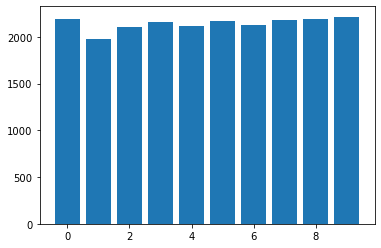

In [8]:
NAME_PATH = 'log//RES_100_1//TransE//'

model_complex = torch.load(NAME_PATH+'model.pt', map_location="cuda:1")
cust_embed = model_complex['entity_embedding']
data = pd.read_csv ('data//df_100_1.csv')

cluster_ids_x, cluster_centers = customer_clustering(cust_embed, NUM_CLUSTERS, NAME_PATH)
count_df, amount_df = distr_category(cluster_ids_x, data, NAME_PATH)